1. Scikit Learning

In [1]:
pip install --upgrade scikit-learn==0.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 7.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


if use juypter notebook, add %

In [2]:
pip install scikit-learn

import dataset from sklearn

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [11]:
X, y = load_breast_cancer(return_X_y=True)

Import models

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [13]:
mod = LinearRegression()
mod.fit(X, y)

LinearRegression()

In [21]:
score1=mod.predict(X)

In [22]:
score1.mean()

0.627416520210896

In [26]:
mod1 = KNeighborsRegressor()
mod1.fit(X,y)
socre2 = mod.predict(X)

In [27]:
socre2.mean()

0.627416520210896

In [28]:
import matplotlib.pylab as plt

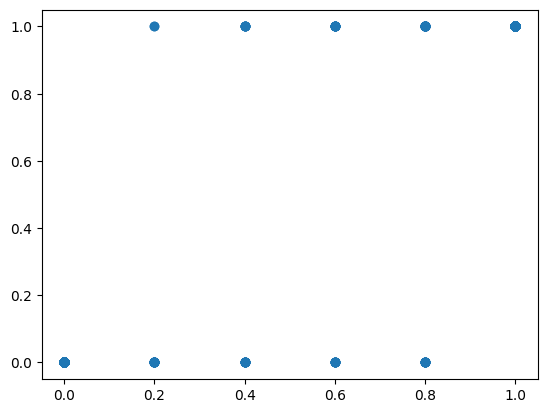

In [29]:
mod3 = KNeighborsRegressor().fit(X, y)
pred = mod3.predict(X)
plt.scatter(pred, y)

Pipeline

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

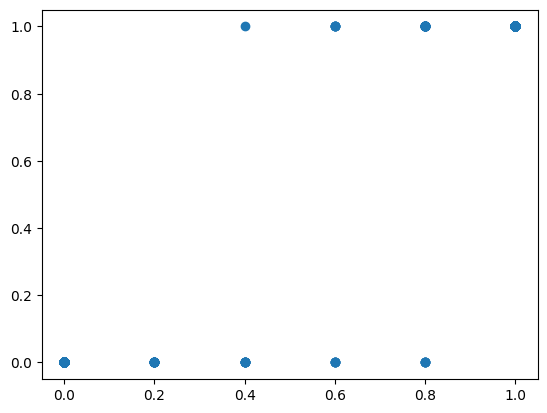

In [32]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [35]:
mod = GridSearchCV(estimator=pipe,
                   param_grid={
                     'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                   },
                   cv=3)
mod.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [36]:
mod.fit(X, y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007832,0.004811,0.059465,0.061135,1,{'model__n_neighbors': 1},0.831504,0.798729,0.668844,0.766359,0.070240,10
1,0.008403,0.004561,0.129059,0.015077,2,{'model__n_neighbors': 2},0.836770,0.877001,0.774212,0.829327,0.042292,9
2,0.001772,0.000207,0.031191,0.035907,3,{'model__n_neighbors': 3},0.810442,0.903092,0.819369,0.844301,0.041731,4
3,0.001513,0.000085,0.009367,0.005684,4,{'model__n_neighbors': 4},0.802544,0.886785,0.847593,0.845641,0.034419,2
4,0.001572,0.000134,0.002334,0.000107,5,{'model__n_neighbors': 5},0.785168,0.902495,0.861516,0.849727,0.048619,1
5,0.001430,0.000060,0.007168,0.003502,6,{'model__n_neighbors': 6},0.772999,0.897501,0.866199,0.845566,0.052880,3
6,0.005940,0.006219,0.028071,0.026115,7,{'model__n_neighbors': 7},0.777775,0.892747,0.861148,0.843890,0.048498,5
7,0.003654,0.003016,0.002486,0.000067,8,{'model__n_neighbors': 8},0.756471,0.888532,0.871112,0.838705,0.058582,6
8,0.001415,0.000093,0.009112,0.004751,9,{'model__n_neighbors': 9},0.749857,0.894809,0.851333,0.831999,0.060735,7
9,0.001413,0.000123,0.004099,0.002462,10,{'model__n_neighbors': 10},0.741148,0.896681,0.852786,0.830205,0.065473,8


In [37]:
print(load_breast_cancer()['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Lunr

In [43]:
import pandas as pd

df = pd.read_csv("https://calmcode.io/static/data/clinc.csv").assign(idx=lambda d: d.index)
df.sample(3)

,text,label,idx
18922,making ribs perfectly is done how,recipe,18922
13219,i wanna know the exchange rate between yen and...,exchange_rate,13219
16813,can i increase my credit limit from 1000 to 20...,credit_limit_change,16813


assign(idx=lambda d: d.index)
assign:  create new columns in a DataFrame based on existing columns or other data. The assign function returns a new DataFrame with the added columns, so it does not modify the original DataFrame in place.
idx=lambda: the new column named "idx".
lambda: Lambda functions are often used when you need a simple function for a short period of time and you don't want to formally define a separate function using the def keyword.
idx=lambda d: d.index: takes each row (d) and returns its index.

In [44]:
documents = df.to_dict(orient="records")

.to_dict(orient="records")：converts the DataFrame into a dictionary.
orient="records：it creates a list where each element is a dictionary representing a row in the DataFrame.

In [46]:
pip install lunr

In [47]:
from lunr import lunr

index = lunr(ref='idx', fields=('text',), documents=documents)

The lunr function has three parameters.

ref is the key in the documents to be used sa the reference.
fields is a sequence of keys to index from the documents.
documents is the list of dictionaries that resemble the documents to be indexed.

ref='idx': This specifies the key in each document dictionary that Lunr should use as a reference.
fields=('text',): This parameter specifies which fields in the documents Lunr should index for search.

In [48]:
index.search('spanish')

[{'ref': '4501', 'score': 7.801, 'match_data': <MatchData "spanish">},
 {'ref': '3', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '26', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '27', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '28', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '4526', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '4529', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '4556', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '4573', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '4575', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '4576', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '4585', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '5638', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '19505', 'score': 7.62, 'match_data': <MatchData "spanish">},
 {'ref': '19507', 'score': 

 index.search('spanish'): Lunr searches through the indexed documents to find matches for the term "spanish". It returns the results of the search, typically as a list of objects representing the matching documents, along with their relevance scores.

In [49]:
[documents[int(i['ref'])] for i in index.search('spanish')]

[{'text': "can you tell me how to say 'i do not speak much spanish', in spanish",
  'label': 'translate',
  'idx': 4501},
 {'text': 'how do you say fast in spanish', 'label': 'translate', 'idx': 3},
 {'text': 'what is dog in spanish', 'label': 'translate', 'idx': 26},
 {'text': 'how do you say dog in spanish', 'label': 'translate', 'idx': 27},
 {'text': 'dog in spanish', 'label': 'translate', 'idx': 28},
 {'text': 'how can i say not now in spanish',
  'label': 'translate',
  'idx': 4526},
 {'text': 'how do you say goodbye in spanish',
  'label': 'translate',
  'idx': 4529},
 {'text': 'what is spanish for hello', 'label': 'translate', 'idx': 4556},
 {'text': 'how do you say thank you in spanish',
  'label': 'translate',
  'idx': 4573},
 {'text': 'how can i say thank you in spanish',
  'label': 'translate',
  'idx': 4575},
 {'text': 'what is thank you in spanish', 'label': 'translate', 'idx': 4576},
 {'text': 'how do you say cat in spanish', 'label': 'translate', 'idx': 4585},
 {'text': 

The final result is a list containing the actual documents that match the search query "spanish" based on the results obtained from the Lunr index search. Each element in the list represents a matching document.

Saving and Loading

In [51]:
import json
from lunr.index import Index

serialized = index.serialize()

# Save the index
with open('idx.json', 'w') as fd:
    json.dump(serialized, fd)

# Load it again
with open("idx.json") as fd:
    reloaded = json.loads(fd.read())

idx = Index.load(reloaded)
idx.search("plant")

[{'ref': '11998', 'score': 9.056, 'match_data': <MatchData "plant">},
 {'ref': '9435', 'score': 8.144, 'match_data': <MatchData "plant">},
 {'ref': '2097', 'score': 7.399, 'match_data': <MatchData "plant">},
 {'ref': '9433', 'score': 7.399, 'match_data': <MatchData "plant">},
 {'ref': '23246', 'score': 7.399, 'match_data': <MatchData "plant">},
 {'ref': '9439', 'score': 6.778, 'match_data': <MatchData "plant">},
 {'ref': '19441', 'score': 6.254, 'match_data': <MatchData "plant">}]

Benchmark

In [52]:
%timeit df.loc[lambda d: d['text'].str.contains("spanish")]

20.2 ms ± 817 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
%timeit [d for d in documents if 'spanish' in d['text']]

4.47 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
%timeit index.search('spanish')

1.1 ms ± 440 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [55]:
%timeit [documents[int(i['ref'])] for i in index.search('spanish')]

748 µs ± 149 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
